In [266]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otraas

In [267]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [268]:
# directorios (path) de entrada y salida:
# 
path_in="/home/emontoya/st1800/class20191/datasets/papers-sample/"
path_out="/home/emontoya/st1800/out/"

In [269]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/emontoya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/emontoya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
# ejemplo de como nltk tokeniza:
texto="texto libre que permite crear     hiso1iras epor--4 no se preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

15
['texto', 'libre', 'que', 'permite', 'crear', 'hiso1iras', 'epor', '--', '4', 'no', 'se', 'preocupe', 'hola', 'mundo', 'cruel']


In [161]:
# note la estrategia de tokenizar con sentencias simples de python, 
# ¿ cual le parece mejor?
# y note la diferencia entre .split() y .split(' ')
texto="texto libre que permite crear     hiso1iras epor--4 no se preocupe \n hola mundo cruel"
tokens = texto.split()
print(len(tokens))
print(tokens)
tokens = texto.split(' ')
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso1iras', 'epor--4', 'no', 'se', 'preocupe', 'hola', 'mundo', 'cruel']
18
['texto', 'libre', 'que', 'permite', 'crear', '', '', '', '', 'hiso1iras', 'epor--4', 'no', 'se', 'preocupe', '\n', 'hola', 'mundo', 'cruel']


In [164]:
# otra libreria diferentes de nltk para diccionario de stopwords, cual será mejor?
# $ pip install stop-words
# $ git clone --recursive git://github.com/Alir3z4/python-stop-words.git

from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words = get_stop_words('en')
print(len(stop_words))
print(stop_words)

174
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves'

In [165]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'on', 'my', 'so', 'we', 'y', 'them', 'myself', 'from', "that'll", 'a', 'these', 'who', 'am', 'in', "wasn't", 'does', 'just', 'before', 'at', 'of', 'herself', 'your', 's', "wouldn't", 'll', 'me', "you'd", 'isn', 'wasn', 'having', 'mightn', 'they', 'been', 'not', 'for', 'now', 'and', "couldn't", 'needn', 'below', 'each', 'being', 'over', 'both', 'what', 'doesn', 'have', 'further', 'very', 'yourself', 'his', "doesn't", 'm', 'him', "haven't", 'when', 'nor', 'mustn', 'you', 'shouldn', 'because', 'under', 'about', 'too', 'o', 'same', "needn't", "weren't", 'all', 'whom', 'doing', "you've", 'can', "didn't", "it's", 'ma', 'but', 'off', 've', 'once', 'by', "you'll", 'those', 'here', "hasn't", 'between', 'which', 'such', 'will', "she's", 'own', 'aren', 'weren', 'hasn', 'through', 'into', 'it', 'are', 'other', 'an', 'until', 'down', 'where', 'more', "won't", 'themselves', 'is', 'did', 'theirs', 'there', 'that', 'ours', "hadn't", 'most', 'ain', 'out', 'some', 'itself', 're', 'be', 'won', 'agai

In [168]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en
x = len(voc_en.words())
print('tamaño del diccionario en ingles del nltk: ',x)
# verifica si una palabra pertenece al diccionario:
w = "house"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words):
    print(w," true")
else:
    print(w," false")
    
w = "pepito"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words):
    print(w," true")
else:
    print(w," false")    

tamaño del diccionario en ingles del nltk:  236736
house  true
pepito  false


In [191]:
# leer un archivo de ejemplo en .txt
input_file = open(path_in+"0803.2570.txt", "r", encoding='iso-8859-1')
#output_file_filtered = open(path_out+"0704.3504_filtered.txt", "w")
#output_file_drop = open(path_out+"0704.3504_drop.txt", "w")
filedata = input_file.read()

numero de palabras finales =  2059
[('message', 207), ('m1', 184), ('error', 165), ('pr', 164), ('special', 163), ('ln', 152), ('exponent', 137), ('capacity', 116), ('code', 113), ('messages', 107), ('probability', 105), ('sequence', 103), ('achieving', 88), ('decoding', 83), ('wy', 82), ('theorem', 80), ('m2', 80), ('codes', 78), ('length', 77), ('feedback', 77)]


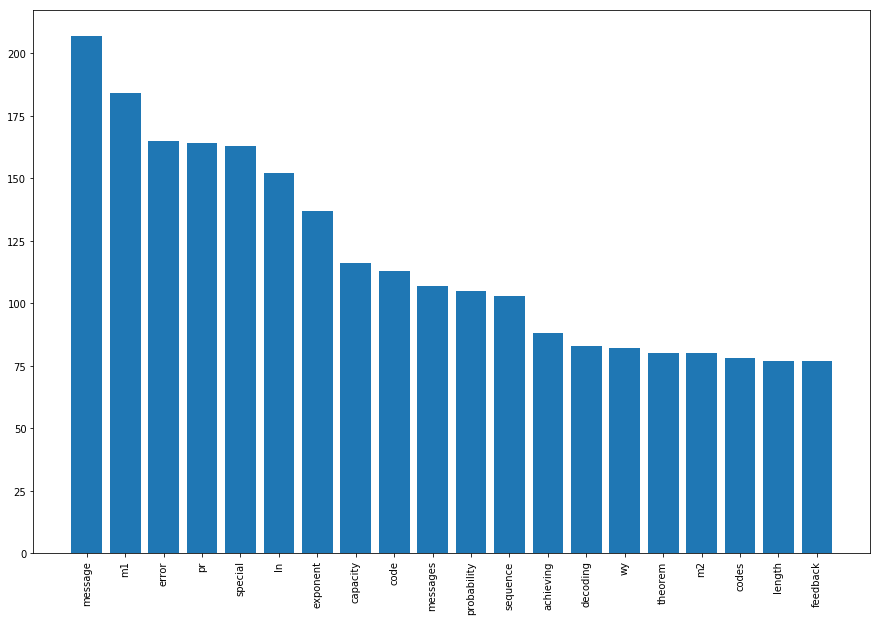

In [207]:
# opción 1:
# TOKENIZAR con .split(), 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words de nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  1973
[('', 1552), ('x', 224), ('pr', 221), ('message', 207), ('m1', 192), ('error', 165), ('special', 163), ('ln', 160), ('exponent', 137), ('capacity', 116), ('6', 115), ('code', 113), ('messages', 107), ('probability', 105), ('px', 104), ('sequence', 103), ('wy', 97), ('c', 92), ('n', 90), ('achieving', 88)]


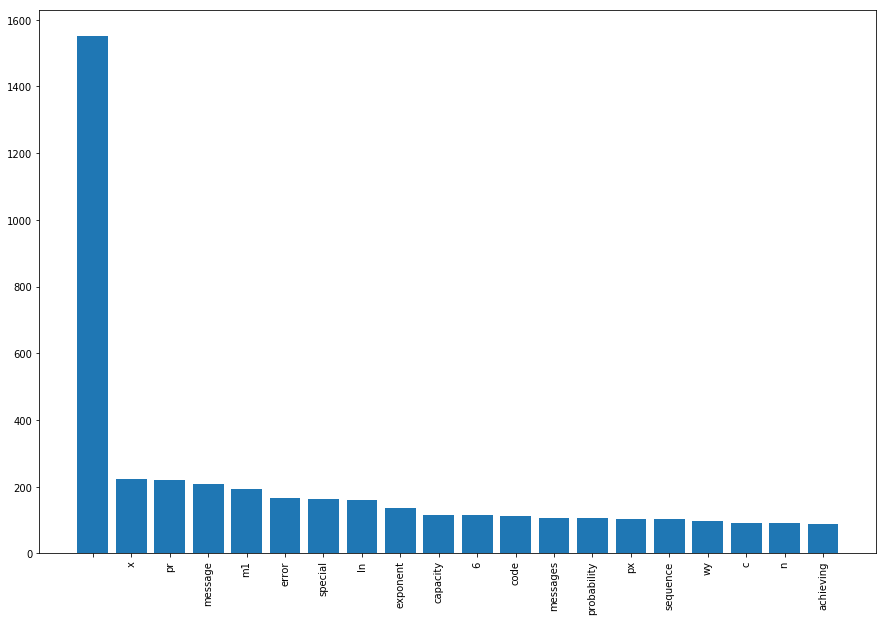

In [208]:
# opción 2:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

tokens = nltk.word_tokenize(filedata)
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  1444


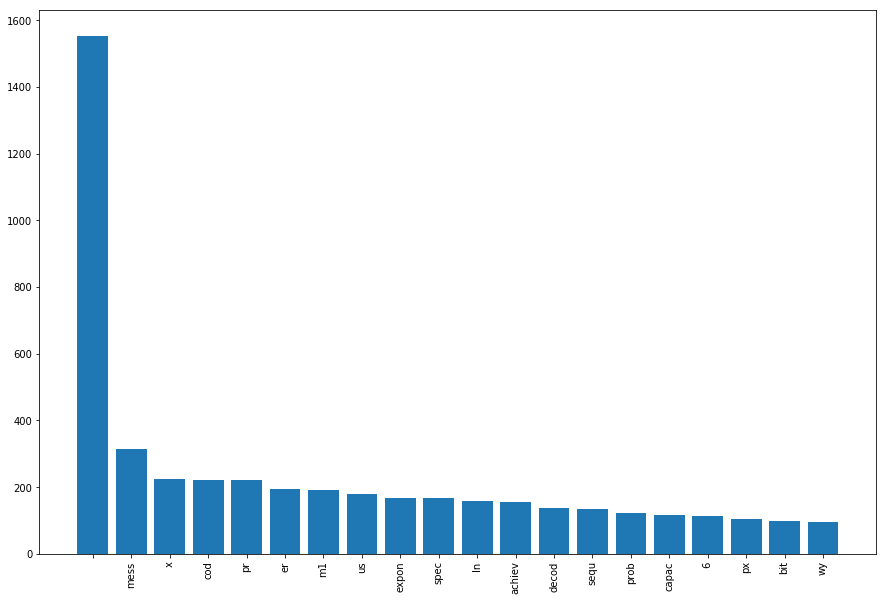

In [210]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  1436


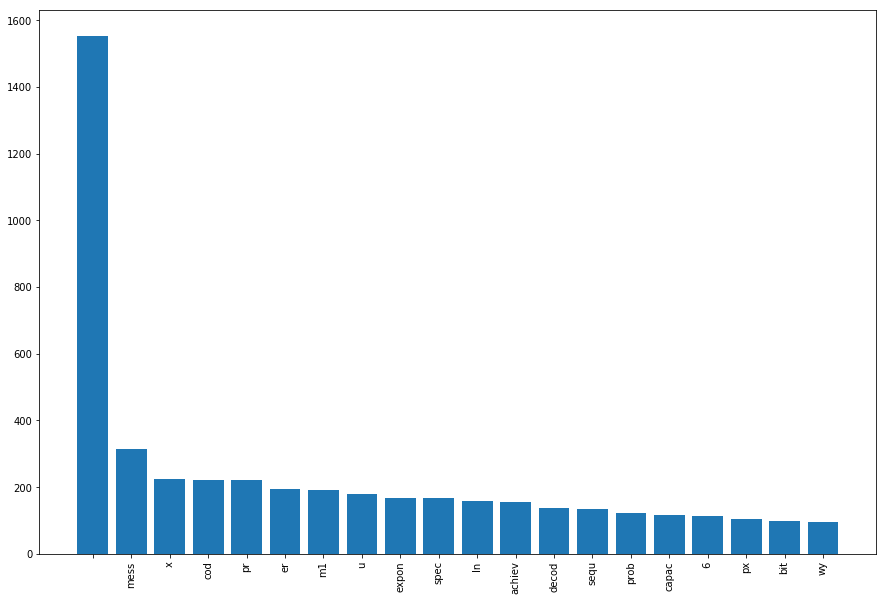

In [212]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [270]:
# leer un archivo de ejemplo en .txt
input_file = open(path_in+"0803.2570.txt", "r", encoding='iso-8859-1')
output_file_clean = open(path_out+"0803.2570_clean.txt", "w")

In [271]:
for line in input_file:
    line_clean = ""
    
    tokens = line.split()
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words_nltk]
    
    for w in tokens:
        line_clean=line_clean+w+" "
            
    if (line_clean!=""):
        line_clean=line_clean+"\n"
        output_file_clean.write(line_clean)
output_file_clean.close()        

In [272]:
input_file_clean = open(path_out+"0803.2570_clean.txt", "r", encoding='iso-8859-1')

numero de palabras finales =  1784


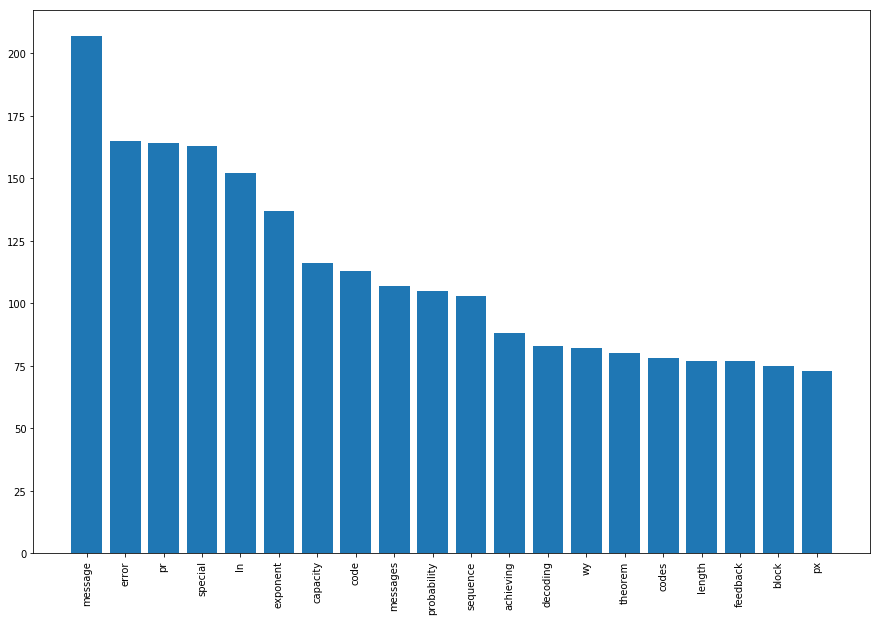

In [273]:
filedata = input_file_clean.read()
tokens = filedata.split()
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [274]:
word_freq = fdist.most_common(len(fdist))

In [275]:
import csv

with open(path_out+'0803.2570_tf.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["word", "frecuency"])
    writer.writerows(word_freq)

csvFile.close()

In [276]:
# extract top 30 words
top_words = word_freq[:20]
print(top_words)

[('message', 207), ('error', 165), ('pr', 164), ('special', 163), ('ln', 152), ('exponent', 137), ('capacity', 116), ('code', 113), ('messages', 107), ('probability', 105), ('sequence', 103), ('achieving', 88), ('decoding', 83), ('wy', 82), ('theorem', 80), ('codes', 78), ('length', 77), ('feedback', 77), ('block', 75), ('px', 73)]


In [277]:
import pandas as pd
df = pd.DataFrame(top_words)
df.head()

,0,1
0,message,207
1,error,165
2,pr,164
3,special,163
4,ln,152


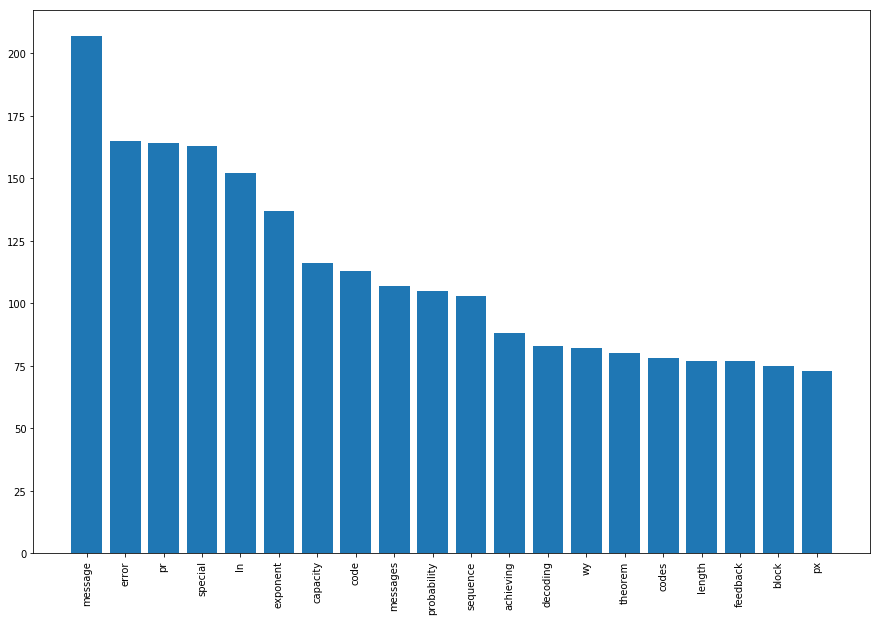

In [278]:
import matplotlib.pyplot as plt
x,y = zip(*top_words)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

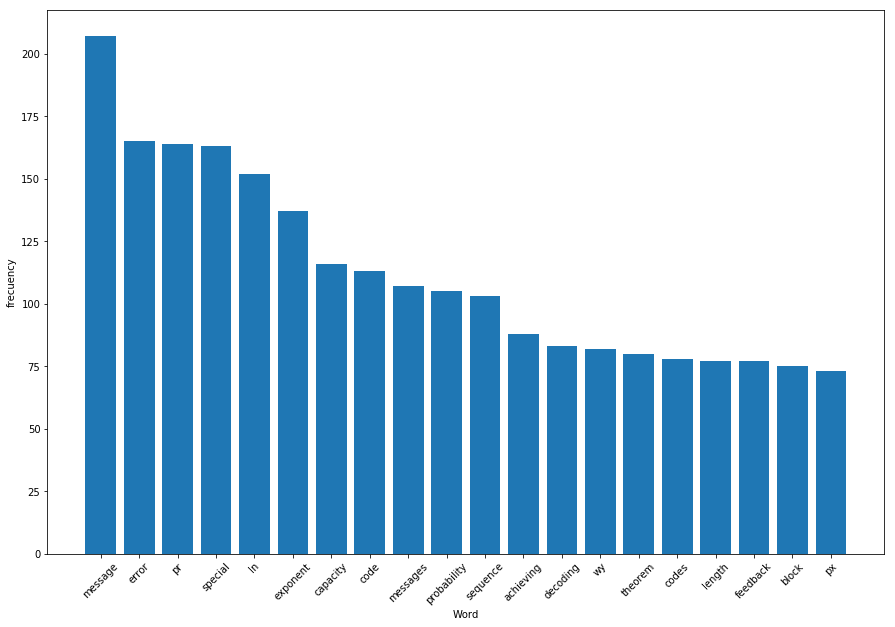

In [279]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_words)
plt.figure(figsize=(15,10))
plt.bar(df[0],df[1])
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("frecuency")
plt.show()